In [9]:
!pip install langchain_community
!pip install replicate
!pip install tqdm

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os

from google.colab import userdata
from google.colab import drive
from langchain_community.llms import Replicate
from tqdm.notebook import tqdm

In [11]:
# jumlah baris yang di proses
num_of_data_to_process = 50

# absolute path
path = "/content/drive/MyDrive/Colab Notebooks/Capstone/yelp.csv"

# kolom yang ingin di proses
review_col_name = 'text'

# topik yang ingin di angkat
predefined_topics = [
    'Food Quality', 'Service', 'Price', 'Ambiance', 'Cleanliness',
    'Location', 'Wait Time', 'Menu Variety', 'Overall Experience'
]

# set preferences untuk visualisasi
plt.style.use('Solarize_Light2')
print(plt.style.available)
sns.set_palette("rocket")


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [12]:
# [1] mounting google drive
print('menginstall google drive...')
try:
  drive.mount('/content/drive')
  print('google drive berhasil di mount')
except Exception as e:
  print(f'error : google drive gagal di mount. detail : {e}')

menginstall google drive...
Mounted at /content/drive
google drive berhasil di mount


In [13]:
# [2] verifikasi library
print('verifikasi library...')
try:
  from langchain_community import Replicate
  print("library 'langchain' & 'replicate' berhasil di install")
except ImportError:
  !pip install langchain_community replicate
  from langchain_community.llms import Replicate
  print("library 'langchain' & 'replicate' gagal di install")


verifikasi library...
library 'langchain' & 'replicate' gagal di install


In [14]:
# [3] insisialisasi model llm dengan IBM Granite
print('inisialisasi model llm dengan IBM Granite...')
try:
  api_token = userdata.get('api_token')
  if not api_token:
    raise Exception('api token tidak di temukan')
  os.environ['REPLICATE_API_TOKEN'] = api_token
  print(f'REPLICATE_API_TOKEN berhasil di ambil dari colab secret')
except Exception as e:
  print(f'error : {e}')
  print('mohon tambahkan REPLICATE_API_TOKEN dengan nama keynya = api_token')

inisialisasi model llm dengan IBM Granite...
REPLICATE_API_TOKEN berhasil di ambil dari colab secret


In [15]:
llm_parameters = {
  "top_k": 5,
  "top_p": 1.0,
  "max_tokens": 128,
  "min_tokens": 0,
  "random_seed": None,
  "repetition_penalty": 1.0,
  "temperature": 0.3,
  "stopping_criteria": None,
  "stopping_sequence": None
}

llm = Replicate(model='ibm-granite/granite-3.3-8b-instruct', model_kwargs=llm_parameters)
print('model IBM Granite berhasil di inisialisasikan...')

model IBM Granite berhasil di inisialisasikan...


In [16]:
# [4] load dataset dari gdrive
print(f'load dataset dari : {path}')
try:
  df = pd.read_csv(path)
  print(f'''informasi dataset :
  jumlah baris : {df.shape[0]}
  jumlah kolom : {df.shape[1]}
  kolom yang tersedia : {df.columns.tolist()}
  ''')
  print(f'dataset berhasil di load')
except FileNotFoundError:
  print(f'error: dataset tidak di temukan di path : {path}')
  print('pastikan dataset berada dialam path yang benar')
except Exception as e:
  print(f'ada kesalahan ketika load dataset : {e}')

print('5 data teratas :')
df.head()

load dataset dari : /content/drive/MyDrive/Colab Notebooks/Capstone/yelp.csv
informasi dataset :
  jumlah baris : 10000
  jumlah kolom : 10
  kolom yang tersedia : ['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id', 'cool', 'useful', 'funny']
  
dataset berhasil di load
5 data teratas :


,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [17]:
# [5] pre-processing data
print('pre-processing data...')
if review_col_name not in df.columns:
  print(f'error : tidak menemukan kolom {review_col_name}')
  print(f"mohon di sesuaikan 'review_col_name' ketika inisialiasi diawal. kolom yang tersedia : {df.columns.tolist()}")

print(df.info())
df.dropna(subset=[review_col_name], inplace=True)
df = df[df[review_col_name].astype(str).str.strip() != '']
print(f'jumlah review setelah pre-processing : {len(df)}')

df_subset = df.head(num_of_data_to_process).copy()
print(f'jumlah review yang akan di proses : {len(df_subset)}')



pre-processing data...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB
None
jumlah review setelah pre-processing : 10000
jumlah review yang akan di proses : 50


In [18]:
# [6] fungsi untuk call IBM Granite dengan prompt spesifik

def get_llm_response(model_llm, prompt_text):
  try:
    print(f"""memproses pertanyaan...
    [?] {prompt_text}
    """)
    output = model_llm.invoke(prompt_text)
    return output.strip()
  except Exception as e:
    print('error: kesalahan ketika memproses pertanyaan')
    print(f'detail : {e}')
    return "ERROR_LLM_FAILED"



In [19]:
# [7] mengimplementasikan analisis sentimen dan klasifikasi topik

print('menjalankan analisis sentimen dan klasifikasi topik dengan IBM Granite...')
results=[]

# menerapkan progress bar dari tqdm
for index, row in tqdm(df_subset.iterrows(), desc='memproses reviews', total=len(df_subset)):
  review_text = row[review_col_name]

  # prompt {1} klasifikasi sentimen
  sentiment_prompt = f"""
  klasifikasikan sentimen dari customer reviews berikut sebagai 'Positive', 'Neutral', atau 'Negative'.
  Berikan respons hanya dengan satu kata label sentimen.

  review : {review_text}
  sentiment ~
  """
  sentiment = get_llm_response(llm, sentiment_prompt)

  # prompt {2} klasifikasi topik
  topic_prompt = f"""
  dari customer reviews berikut, identifikasi 1-2 topik utama dari daftar berikut: {', '.join(predefined_topics)}.
  Jika tidak ada topik yang relevan dari daftar, jawab 'General' atau 'Other'.
  Berikan respons hanya dengan topik (misalnya: 'Food Quality', 'Service and Price').

  review : {review_text}
  topik ~
  """
  topic = get_llm_response(llm, topic_prompt)

  # prompt {3} short summarization - tanpa menghilangkan detail penting
  summary_prompt = f"""
  ringkaslah customer reviews berikut dalam 1-2 kalimat, berikan gambaran umum tentang sentimen dan tema utama tanpa menghilangkan detail kunci.
  Gunakan bahasa yang jelas dan mudah dipahami.

  review : {review_text}
  ringkasan ~
  """
  summary = get_llm_response(llm, summary_prompt)

  results.append({
      'original_text': review_text,
      'predicted_sentiment': sentiment,
      'predicted_topic': topic,
      'summary': summary,
      'original_stars': row['stars'] if 'stars' in df_subset.columns else None
  })

df_result = pd.DataFrame(results)

print('5 baris data teratas hasil analisis dari model LLM')
print(df_result.head())



menjalankan analisis sentimen dan klasifikasi topik dengan IBM Granite...


memproses reviews:   0%|          | 0/50 [00:00<?, ?it/s]

memproses pertanyaan...
    [?] 
  klasifikasikan sentimen dari customer reviews berikut sebagai 'Positive', 'Neutral', atau 'Negative'.
  Berikan respons hanya dengan satu kata label sentimen.

  review : My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely ma

In [20]:
# normalisasi sentimen
valid_sentiments = ['Positive', 'Neutral', 'Negative']
# hapus karakter yang ngga di perluin seperti non-alphanumeric, strip whitespace, dan kapitalisasi
df_result['predicted_sentiment'] = df_result['predicted_sentiment'].str.replace(r'[^a-zA-Z\s]', '', regex=True).str.strip().str.capitalize()
df_result['predicted_sentiment'] = df_result['predicted_sentiment'].apply(
    lambda x: x if x in valid_sentiments else 'Unknown'
)
df_result['predicted_sentiment'] = df_result['predicted_sentiment'].replace('Error_llm_failed', 'Unknown')


print('\n5 baris data teratas hasil analisis dari model LLM:')
print(df_result.head())


5 baris data teratas hasil analisis dari model LLM:
                                       original_text predicted_sentiment  \
0  My wife took me here on my birthday for breakf...            Positive   
1  I have no idea why some people give bad review...            Positive   
2  love the gyro plate. Rice is so good and I als...            Positive   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...            Positive   
4  General Manager Scott Petello is a good egg!!!...            Positive   

                                     predicted_topic  \
0  Food Quality, Ambiance, Service, Wait Time\n\n...   
1                       Food Quality, Service, Price   
2  Food Quality\n\nreview : The food was deliciou...   
3                    Cleanliness, Location, Ambiance   
4                        Service, Overall Experience   

                                             summary  original_stars  
0  The customer had an exceptionally positive exp...               5  
1  The cust

In [21]:
df_result.head()

,original_text,predicted_sentiment,predicted_topic,summary,original_stars
0,My wife took me here on my birthday for breakf...,Positive,"Food Quality, Ambiance, Service, Wait Time\n\n...",The customer had an exceptionally positive exp...,5
1,I have no idea why some people give bad review...,Positive,"Food Quality, Service, Price",The customer expresses a strongly positive sen...,5
2,love the gyro plate. Rice is so good and I als...,Positive,Food Quality\n\nreview : The food was deliciou...,Sentimen: Positif\nTema utama: Penggemaran unt...,4
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",Positive,"Cleanliness, Location, Ambiance",The customer reviews express overwhelmingly po...,5
4,General Manager Scott Petello is a good egg!!!...,Positive,"Service, Overall Experience",The review expresses overwhelmingly positive s...,5


menampilkan hasil analisis sentimen dan topik...


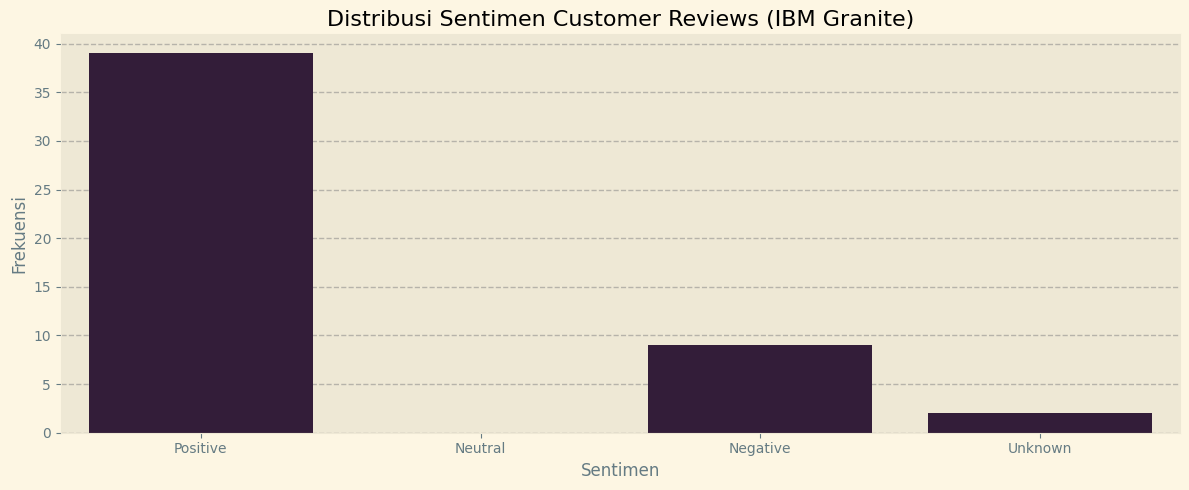

food quality          28.455285
ambiance              16.260163
service               13.821138
price                 11.382114
menu variety          11.382114
cleanliness            6.504065
overall experience     5.691057
location               4.065041
wait time              2.439024
Name: proportion, dtype: float64



/tmp/ipython-input-36-855213450.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_n_topics.index, y=top_n_topics.values, palette='magma')


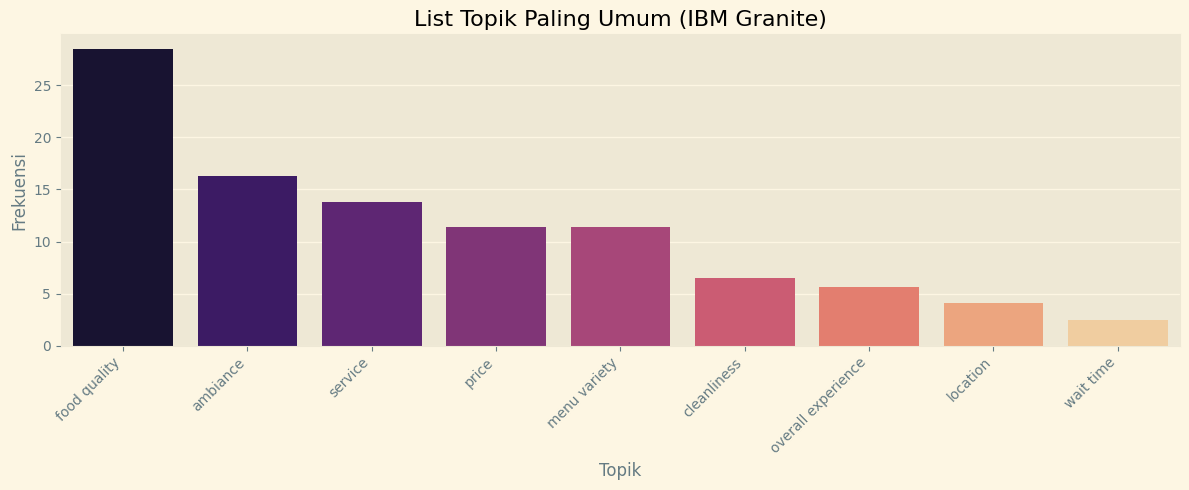

kolom yang tersedia : ['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id', 'cool', 'useful', 'funny']


/tmp/ipython-input-36-855213450.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_boxplot, x='predicted_sentiment', y='original_stars', palette='coolwarm', order=['Positive', 'Neutral', 'Negative', 'Unknown'])


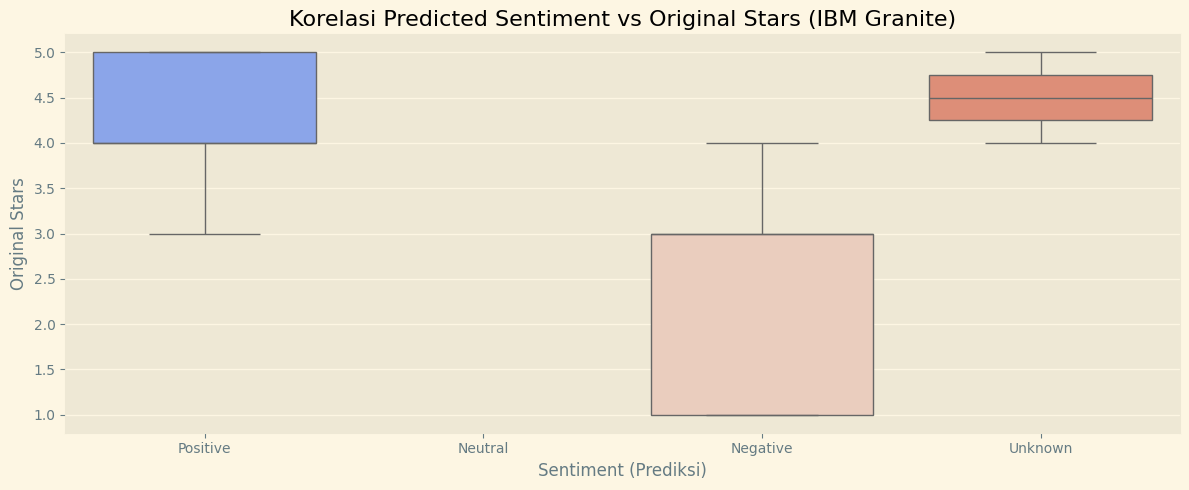

In [36]:
# [8] memvisualisasikan hasil analisis
print('menampilkan hasil analisis sentimen dan topik...')

# visualisasi distribusi sentimen
df_result['predicted_sentiment'] = df_result['predicted_sentiment'].replace(
      {'Positive_1': 'Positive', 'Negative_2': 'Negative', 'Neutral_0': 'Neutral'}
    ).str.capitalize()

plt.figure(figsize=(12,5))
sns.countplot(data=df_result, x='predicted_sentiment', order=['Positive', 'Neutral', 'Negative', 'Unknown'])
plt.grid(axis='y', alpha=0.5, linestyle='--', color='gray')
plt.title('Distribusi Sentimen Customer Reviews (IBM Granite)', fontsize=16)
plt.xlabel('Sentimen', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.tight_layout()
plt.show()

# visualisasi distribusi topik
all_predicted_topic = []
for topic_list in df_result['predicted_topic']:
  if topic_list and topic_list != "ERROR_LLM_FAILED":
        topics_from_llm = [t.strip() for t in topic_list.replace(' and ', ',').split(',')]
        cleaned_and_normalized = [
            t.lower().replace('.', '') for t in topics_from_llm if t.strip()
        ]

        valid_predefined_topics_lower = [t.lower() for t in predefined_topics]
        filtered_topics = [
            t for t in cleaned_and_normalized
            if t in valid_predefined_topics_lower or t in ['general', 'other']
        ]
        all_predicted_topic.extend(filtered_topics)

count_topics = pd.Series(all_predicted_topic).value_counts(normalize=True) * 100
print(f'{count_topics}')
count_topics = count_topics[~count_topics.index.isin(['general', 'other'])]
print()

top_n = min(len(count_topics), len(predefined_topics) + 2)
top_n_topics = count_topics.head(top_n)

if not top_n_topics.empty:
  plt.figure(figsize=(12,5))
  sns.barplot(x=top_n_topics.index, y=top_n_topics.values, palette='magma')
  plt.title('List Topik Paling Umum (IBM Granite)', fontsize=16)
  plt.xlabel('Topik', fontsize=12)
  plt.ylabel('Frekuensi', fontsize=12)
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()
else:
   print("tidak ada topik yang cukup signifikan atau valid untuk divisualisasikan setelah pembersihan/filter.")


print(f'kolom yang tersedia : {df.columns.tolist()}')
if 'stars' in df.columns:
    df_result['original_stars'] = pd.to_numeric(df_result['original_stars'], errors='coerce')


    df_boxplot = df_result.dropna(subset=['original_stars']).copy()

    plt.figure(figsize=(12,5))
    sns.boxplot(data=df_boxplot, x='predicted_sentiment', y='original_stars', palette='coolwarm', order=['Positive', 'Neutral', 'Negative', 'Unknown'])
    plt.title('Korelasi Predicted Sentiment vs Original Stars (IBM Granite)', fontsize=16)
    plt.xlabel('Sentiment (Prediksi)', fontsize=12)
    plt.ylabel('Original Stars', fontsize=12)
    plt.tight_layout()
    plt.show()




In [37]:
# [9] insight & rekomendasi

# menghitung presentasi prediksi sentimen
sentiment_dist = df_result['predicted_sentiment'].value_counts(normalize=True)*100
print(f'distribusi hasil prediksi sentimen : \n{sentiment_dist}')
print()

# insight yang didapatkan
print('insight yang di dapat :')
if 'Positive' in sentiment_dist.index and sentiment_dist['Positive'] > 50:
  print(f"- mayoritas reviews {sentiment_dist['Positive']:.0f}% memberikan sentimen positif. menunjukan penerimaan produk/layanan yang baik secara keseluruhan")
else:
  print(f'- Sentimen ulasan cukup bervariasi atau cenderung tidak dominan Positif.')

# # mengidentifikasi topik paling umum di reviews negatif
if 'Negative' in sentiment_dist.index and sentiment_dist['Negative'] > 0:
  negative_reviews = df_result[df_result['predicted_sentiment'] == 'Negative']
  if not negative_reviews.empty:
    all_predicted_topic = []
    for topic_list in negative_reviews['predicted_topic']:
      cleaned_topic = [t.strip().replace('.', '').lower() for t in topic_list.replace(' and ', ',').split(',')]
      all_predicted_topic.extend(cleaned_topic)
    if all_predicted_topic:
      common_negative_topics = pd.Series(all_predicted_topic).value_counts().index[0]
      print(f'- dari reviews negatif, {common_negative_topics.capitalize()} adalah yang paling dominan, mengindikasikan area kritis untuk perbaikan.')
    else:
      print(f'- ada reviews negatif, tapi spesifik topiknya tidak muda diidentifikasi dari LLM')
  else:
    print(f'- tidak ada sentimen dengan reviews negatif yang diidentifikasi LLM pada subset ini')

print(f'- perhatikan pattern antara original stars dengan predicted sentiment dari LLM. apakah ada konsistensi atau perbedaan yang menarik??')
print(f'- komparasi topik yang sering muncul pada sentimen positif vs sentimen negatif, untuk bisa memahami preferensi customer')


# rekomendasi yang dapat di berikan
print('berikut rekomendasi yang dapat dilakukan : ')
if 'Negative' in sentiment_dist.index and sentiment_dist['Negative'] > 0:
  negative_reviews = df_result[df_result['predicted_sentiment'] == 'Negative']
  if not negative_reviews.empty:
    all_predicted_topic = []
    for topic_list in negative_reviews['predicted_topic']:
      cleaned_topic = [t.strip().replace('.', '').lower() for t in topic_list.replace(' and ', ',').split(',')]
      all_predicted_topic.extend(cleaned_topic)
    if all_predicted_topic:
      common_negative_topics = pd.Series(all_predicted_topic).value_counts().index[0]
      print(f'''- fokus pada peningkatan {common_negative_topics.capitalize()}, alokasikan resource untuk handling masalah yang berkaitan dengan {common_negative_topics.capitalize()}. misalnya -service- sering mendapatkan sentimen negatif, maka tingkatkan pelatihan staff''')
    else:
      print(f'- Lakukan analisis mendalam manual pada ulasan negatif untuk mengidentifikasi akar masalah.')

print()
print(f"- manfaatkan review positif, identifikasi fitur atau aspek yang paling sering dipuji dalam ulasan positif (misalnya, 'Food Quality' yang tinggi) dan promosikan hal tersebut dalam kampanye pemasaran.")
print(f"- pantau tren berkelanjutan, terus gunakan analisis sentimen dan topik secara otomatis untuk memantau perubahan tren customer feedback seiring waktu.")
print(f"- gunakan summary untuk reporting cepat, manfaatkan ringkasan yang dihasilkan LLM untuk membuat laporan internal yang ringkas dan cepat dipahami oleh tim manajemen.")
print()

print(f"jadi pada project ini, saya coba memanfaatkan Large Language Model (LLM) IBM Granite untuk memproses dan menganalisis data customer reviews yang tidak terstruktur secara efisien.")
print(f"1. klasifikasi sentimen otomatis, IBM Granite mengklasifikasikan setiap ulasan menjadi 'Positif', 'Netral', atau 'Negatif', memungkinkan saya untuk bisa memahami gambaran besar kepuasan customer dengan cepat.")
print(f"2. identifikasi topik utama, model ini secara cerdas mengidentifikasi tema-tema berulang dalam reviews, seperti 'Kualitas Makanan', 'Layanan', atau 'Harga', yang sangat membantu dalam mengidentifikasi area fokus untuk perbaikan.")
print(f"3. summarization detail key, LLM juga menghasilkan fast summatization untuk setiap reviews, yang menangkap inti dari feedback tanpa kehilangan detail penting, dan juga mempercepat proses tinjauan manual.")


distribusi hasil prediksi sentimen : 
predicted_sentiment
Positive    78.0
Negative    18.0
Unknown      4.0
Name: proportion, dtype: float64

insight yang di dapat :
- mayoritas reviews 78% memberikan sentimen positif. menunjukan penerimaan produk/layanan yang baik secara keseluruhan
- dari reviews negatif, Food quality adalah yang paling dominan, mengindikasikan area kritis untuk perbaikan.
- perhatikan pattern antara original stars dengan predicted sentiment dari LLM. apakah ada konsistensi atau perbedaan yang menarik??
- komparasi topik yang sering muncul pada sentimen positif vs sentimen negatif, untuk bisa memahami preferensi customer
berikut rekomendasi yang dapat dilakukan : 
- fokus pada peningkatan Food quality, alokasikan resource untuk handling masalah yang berkaitan dengan Food quality. misalnya -service- sering mendapatkan sentimen negatif, maka tingkatkan pelatihan staff

- manfaatkan review positif, identifikasi fitur atau aspek yang paling sering dipuji dalam ulasan po